# 特征提取与处理

### 上一章案例中的解释变量都是数值，比如匹萨的直接。而很多机器学习问题需要研究的对象可能是分类变量、文字甚至图像。本章，我们介绍提取这些变量特征的方法。这些技术是数据处理的前提——序列化，更是机器学习的基础，影响到本书的所有章节。

## 分类变量特征提取

#### 许多机器学习问题都有分类的、标记的变量，不是连续的。例如，一个应用是用分类特征比如工作地点来预测工资水平。分类变量通常用独热编码（One-of-K or One-Hot Encoding），通过二进制数来表示每个解释变量的特征。

例如，假设city变量有三个值：New York, San Francisco, Chapel Hill。独热编码方式就是用三位二进制数，每一位表示一个城市。

scikit-learn里有DictVectorizer类可以用来表示分类特征：

In [5]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [{'city': 'New York'},{'city': 'San Francisco'}, {'city': 'Chapel Hill'},{'city': 'shen zhen'}]
print(onehot_encoder.fit_transform(instances).toarray())

[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


#### 会看到，编码的位置并不是与上面城市一一对应的。第一个city编码New York是[ 0. 1. 0.]，用第二个元素为1表示。相比用单独的数值来表示分类，这种方法看起来很直观。New York, San Francisco, Chapel Hill可以表示成1，2，3。数值的大小没有实际意义，城市并没有自然数顺序。

### 文字特征提取

#### 很多机器学习问题涉及自然语言处理（NLP），必然要处理文字信息。文字必须转换成可以量化的特征向量。下面我们就来介绍最常用的文字表示方法：词库模型（Bag-of-words model）。

#### 词库模型是文字模型化的最常用方法。对于一个文档（document），忽略其词序和语法，句法，将其仅仅看做是一个词集合，或者说是词的一个组合，文档中每个词的出现都是独立的，不依赖于其他词是否出现，或者说当这篇文章的作者在任意一个位置选择一个词汇都不受前面句子的影响而独立选择的。词库模型可以看成是独热编码的一种扩展，它为每个单词设值一个特征值。词库模型依据是用类似单词的文章意思也差不多。词库模型可以通过有限的编码信息实现有效的文档分类和检索。

一批文档的集合称为文集（corpus）。让我们用一个由两个文档组成的文集来演示词库模型：

In [36]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

####  文集包括8个词：UNC, played, Duke, in, basketball, lost, the, game。文件的单词构成词汇表（vocabulary）。词库模型用文集的词汇表中每个单词的特征向量表示每个文档。我们的文集有8个单词，那么每个文档就是由一个包含8位元素的向量构成。构成特征向量的元素数量称为维度（dimension）。用一个词典（dictionary）来表示词汇表与特征向量索引的对应关系。

在大多数词库模型中，特征向量的每一个元素是用二进制数表示单词是否在文档中。例如，第一个文档的第一个词是UNC，词汇表的第一个单词是UNC，因此特征向量的第一个元素就是1。词汇表的最后一个单词是game。第一个文档没有这个词，那么特征向量的最后一个元素就是0。CountVectorizer类会把文档全部转换成小写，然后将文档词块化（tokenize）。文档词块化是把句子分割成词块（token）或有意义的字母序列的过程。词块大多是单词，但是他们也可能是一些短语，如标点符号和词缀。CountVectorizer类通过正则表达式用空格分割句子，然后抽取长度大于等于2的字母序列。scikit-learn实现代码如下：

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [38]:
#  再添加一个文档
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


#### 通过CountVectorizer类可以得出上面的结果。词汇表里面有10个单词，但a不在词汇表里面，是因为a的长度不符合CountVectorizer类的要求。

对比文档的特征向量，会发现前两个文档相比第三个文档更相似。如果用欧氏距离（Euclidean distance）计算它们的特征向量会比其与第三个文档距离更接近。两向量的欧氏距离就是两个向量欧氏范数（Euclidean norm）或L2范数差的绝对值：

d=∥x0−x1∥
d=‖x0−x1‖
 
向量的欧氏范数是其元素平方和的平方根：

∥x∥=x21+x22+⋯+x2n−−−−−−−−−−−−−−−√
‖x‖=x12+x22+⋯+xn2
 
scikit-learn里面的euclidean_distances函数可以计算若干向量的距离，表示两个语义最相似的文档其向量在空间中也是最接近的。

In [40]:
from sklearn.metrics.pairwise import euclidean_distances
counts = vectorizer.fit_transform(corpus).todense()

example = [[0,1],[0,2],[1,2]]
for x,y in example:
    print(x,y)
    dist = euclidean_distances(counts[x],counts[y])
    print('文档{}与文档{}的距离{}'.format(x,y,dist))

0 1
文档0与文档1的距离[[ 2.44948974]]
0 2
文档0与文档2的距离[[ 2.64575131]]
1 2
文档1与文档2的距离[[ 2.64575131]]


#### 如果我们用新闻报道内容做文集，词汇表就可以用成千上万个单词。每篇新闻的特征向量都会有成千上万个元素，很多元素都会是0。体育新闻不会包含财经新闻的术语，同样文化新闻也不会包含财经新闻的术语。有许多零元素的高维特征向量成为稀疏向量（sparse vectors）。

#### 用高维数据可以量化机器学习任务时会有一些问题，不只是出现在自然语言处理领域。第一个问题就是高维向量需要占用更大内存。NumPy提供了一些数据类型只显示稀疏向量的非零元素，可以有效处理这个问题

####  第二个问题就是著名的维度灾难（curse of dimensionality，Hughes effect），维度越多就要求更大的训练集数据保证模型能够充分学习。如果训练样本不够，那么算法就可以拟合过度导致归纳失败。下面，我们介绍一些降维的方法。在第7章，PCA降维里面，我们还会介绍用数值方法降维。

#### 停用词过滤¶
特征向量降维的一个基本方法是单词全部转换成小写。这是因为单词的大小写一般不会影响意思。而首字母大写的单词一般只是在句子的开头，而词库模型并不在乎单词的位置和语法。

另一种方法是去掉文集常用词。这里词称为停用词（Stop-word），像a，an，the，助动词do，be，will，介词on，around，beneath等。停用词通常是构建文档意思的功能词汇，其字面意义并不体现。CountVectorizer类可以通过设置stop_words参数过滤停用词，默认是英语常用的停用词。

In [41]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


#### 词根还原与词形还原¶
停用词去掉之后，可能还会剩下许多词，还有一种常用的方法就是词根还原（stemming ）与词形还原（lemmatization）。

特征向量里面的单词很多都是一个词的不同形式，比如jumping和jumps都是jump的不同形式。词根还原与词形还原就是为了将单词从不同的时态、派生形式还原。

In [42]:
# binary = True
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(binary=True, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwiches': 3, 'sandwich': 2, 'eaten': 1}


In [43]:
corpus = [
    'I am gathering ingredients for the sandwich.',
    'There were many wizards at the gathering.'
]

第一句的gathering是动词，其词元是gather。后一句的gathering是名词，其词元是gathering。我们用Python的NLTK（Natural Language Tool Kit）库来处理。

In [45]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### NLTK的WordNetLemmatizer可以用gathering的词类确定词元。

In [48]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('fucking', 'v'))
print(lemmatizer.lemmatize('fucking', 'n'))

fuck
fucking


In [49]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]

stemmer = PorterStemmer()
print('Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

Stemmed: [['He', 'ate', 'the', 'sandwich'], ['everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]


In [50]:
def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])

Lemmatized: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


### 带TF-IDF权重的扩展词库¶
前面我们用词库模型构建了判断单词是个在文档中出现的特征向量。这些特征向量与单词的语法，顺序，频率无关。不过直觉告诉我们文档中单词的频率对文档的意思有重要作用。一个文档中某个词多次出现，相比只出现过一次的单词更能体现反映文档的意思。现在我们就将单词频率加入特征向量，然后介绍由词频引出的两个问题。

我们用一个整数来代码单词的频率。代码如下：

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[2 1 3 1 1]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


结果中第一行是单词的频率，dog频率为1，sandwich频率为3。注意和前面不同的是，binary=True没有了，因为binary默认是False，这样返回的是词汇表的词频，不是二进制结果[1 1 1 1 1]。这种单词频率构成的特征向量为文档的意思提供了更多的信息，但是在对比不同的文档时，需要考虑文档的长度。

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'The dog ate a sandwich and I ate a sandwich',
    'The wizard transfigured a sandwich'
]
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}


### 通过哈希技巧实现特征向量¶
前面我们是用包含文集所有词块的词典来完成文档词块与特征向量的映射的。这么做有两个缺点。首先是文集需要被调用两次。第一次是创建词典，第二次是创建文档的特征向量。另外，词典必须储存在内存里，如果文集特别大就会很耗内存。通过哈希表可以有效的解决这些问题。可以将词块用哈希函数来确定它在特征向量的索引位置，可以不创建词典，这称为哈希技巧（hashing trick）。scikit-learn提供了HashingVectorizer来实现这个技巧：

In [55]:
from sklearn.feature_extraction.text import HashingVectorizer
#corpus = ['the', 'ate', 'bacon', 'cat']
corpus = [
    'The dog ate a sandwich and I ate a sandwich',
    'The wizard transfigured a sandwich'
]
vectorizer = HashingVectorizer(n_features=7)
print(vectorizer.transform(corpus).todense())

[[ 0.33333333  0.66666667  0.          0.          0.         -0.66666667
   0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.
   0.70710678]]


### 图片特征提取¶
计算机视觉是一门研究如何使机器“看”的科学，让计算机学会处理和理解图像。这门学问有时需要借助机器学习。本章介绍一些机器学习在计算机视觉领域应用的基础技术。

#### 通过像素值提取特征¶
数字图像通常是一张光栅图或像素图，将颜色映射到网格坐标里。一张图片可以看成是一个每个元素都是颜色值的矩阵。表示图像基本特征就是将矩阵每行连起来变成一个行向量。光学文字识别（Optical character recognition，OCR）是机器学习的经典问题。下面我们用这个技术来识别手写数字。

scikit-learn的digits数字集包括至少1700种0-9的手写数字图像。每个图像都有8x8像像素构成。每个像素的值是0-16，白色是0，黑色是16。如下图所示

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
(8, 8)


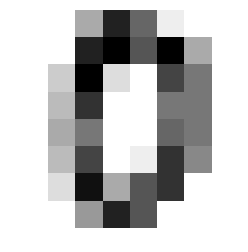

In [57]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
print('Digit:', digits.target[0])
print(digits.images[0])
print(digits.images[0].shape)
plt.figure()
plt.axis('off')
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [58]:
digits = datasets.load_digits()
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

Feature vector:
 [[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


#### 这样表示可以有效的处理一些基本任务，比如识别手写字母等。但是，记录每个像素的数值在大图像处理时不太好用。一个100x100像素的图像其灰度图产生的特征向量是10000维度，而1920x1080像素的图像是2073600。和TF-IDF特征向量不同，大部分图像都不是稀疏的。这种表示法的缺点不只是特征向量的维度灾难，还有就是某个位置的学习结果在经过对图像的放缩，旋转或变换之后可能就不对了，非常敏感，缺乏稳定性。另外，这种方法对图像的亮度也十分敏感。所以这种方法在处理照片和其他自然景色图像时不怎么有用。现代计算机视觉应用通常手工实现特征提取，或者用深度学习自动化解决无监督问题。后面我们会详细介绍。

#### 对感兴趣的点进行特征提取¶
前面创建的特征矢量包含了图像的每个像素，既包含了图像特征的有用信息，也包含了一堆噪声。查看图像后，我们会发现所有的图像都有一个白边，这些像素是没用的。人们不需要观察物体的每个属性就可以很快的识别出很多物体。我们可以根据轮廓识别出汽车，并不需要观察后视镜，我们也可以通过一个鼻子或嘴巴判断图像是一个人。这些直觉就可以用来建立一种表示图像大多数信息属性的方法。这些有信息量的属性，称为兴趣点（points of interest），是由丰富的纹理包围，基本可以重建图像。边缘（edges）和角点（corners）是两种常用的兴趣点类型。边是像素快速变化的分界线（boundary），角是两条边的交集。我们用scikit-image库抽取下图的兴趣点：

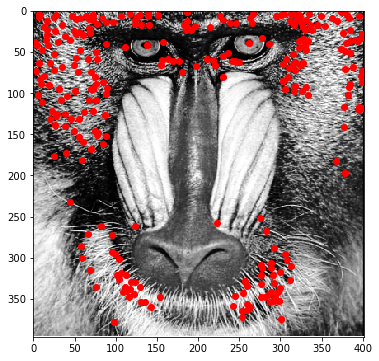

In [72]:

%matplotlib inline
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist


def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

mandrill = io.imread('feifeil.png')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)


In [73]:
corners.shape

(286, 2)

In [74]:
mandrill.shape

(396, 402)

### SIFT和SURF¶
尺度不变特征转换（Scale-Invariant Feature Transform，SIFT）是一种特征提取方法，相比前面使用的方法，SIFT对图像的尺寸，旋转，亮度变化更不敏感。每个SIFT特征都是一个描述图片上某个区域边缘和角点的向量。和兴趣点不同，SIFT还可以获取每个兴趣点和它周围点的综合信息。加速稳健特征（Speeded-Up Robust Features，SURF）是另一个抽取图像兴趣点的方法，其特征向量对图像的尺寸，旋转，亮度变化是不变的。SURF的算法可以比SIFT更快，更有效的识别出兴趣点。

两种方法的具体理论解释在数字图像处理类的教材中都有介绍，感兴趣的同学可以研究。这样用mahotas库来应用SURF方法处理下面的图片。

In [78]:
import mahotas as mh
from mahotas.features import surf

image = mh.imread('3.2 xiaobao.png', as_grey=True)
print('第一个SURF描述符：\n{}\n'.format(surf.surf(image)[0]))
print('抽取了%s个SURF描述符' % len(surf.surf(image)))

第一个SURF描述符：
[  1.15299134e+02   2.56185453e+02   3.51230841e+00   3.32786485e+02
   1.00000000e+00   1.75644866e+00  -2.94268692e-03   3.30736379e-03
   2.94268692e-03   3.30736379e-03  -2.58778609e-02   3.25587066e-02
   2.58778609e-02   3.25587066e-02  -3.03768176e-02   4.18212640e-02
   3.03768176e-02   4.18212640e-02  -5.75169209e-03   7.66422266e-03
   5.75169209e-03   7.66422266e-03  -1.85200481e-02   3.10523761e-02
   1.85200481e-02   3.10523761e-02  -9.61023554e-02   2.59842816e-01
   1.12794174e-01   2.59842816e-01  -6.66368114e-02   2.72006376e-01
   1.40583321e-01   2.72006376e-01  -1.91014197e-02   5.28250599e-02
   2.03376276e-02   5.28250599e-02  -2.24247135e-02   3.35105185e-02
   2.24247135e-02   3.35105185e-02  -2.36547964e-01   3.18867366e-01
   2.36547964e-01   3.18867366e-01  -2.49737941e-01   3.00644512e-01
   2.50125503e-01   3.03596724e-01  -1.69936886e-02   3.82398567e-02
   2.00617910e-02   3.82398567e-02  -3.72417955e-03   5.53246035e-03
   3.72417955e-03   5.